<a href="https://colab.research.google.com/github/sumaia42/Machine_Learning/blob/main/jobs_and_salaries_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


In [ ]:
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
df.drop(columns={'company_size','salary_currency','salary_in_usd'
                      , 'employee_residence', 'company_location'}, inplace=True)

In [ ]:
df.rename(columns={'work_year':'year'}, inplace=True)

In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              9355 non-null   int64 
 1   job_title         9355 non-null   object
 2   job_category      9355 non-null   object
 3   salary            9355 non-null   int64 
 4   experience_level  9355 non-null   object
 5   employment_type   9355 non-null   object
 6   work_setting      9355 non-null   object
dtypes: int64(2), object(5)
memory usage: 511.7+ KB


,year,job_title,job_category,salary,experience_level,employment_type,work_setting
0,2023,Data DevOps Engineer,Data Engineering,88000,Mid-level,Full-time,Hybrid
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote


In [ ]:
for i in df.columns:
    print('--'*44)
    print(i)
    print(df[i].unique())
df.nunique()

----------------------------------------------------------------------------------------
year
[2023 2022 2020 2021]
----------------------------------------------------------------------------------------
job_title
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intel

year                   4
job_title            125
job_category          10
salary              1507
experience_level       4
employment_type        4
work_setting           3
dtype: int64

In [ ]:
df['year'].value_counts()


year
2023    7453
2022    1634
2021     197
2020      71
Name: count, dtype: int64

Text(0.5, 1.0, 'Work years')

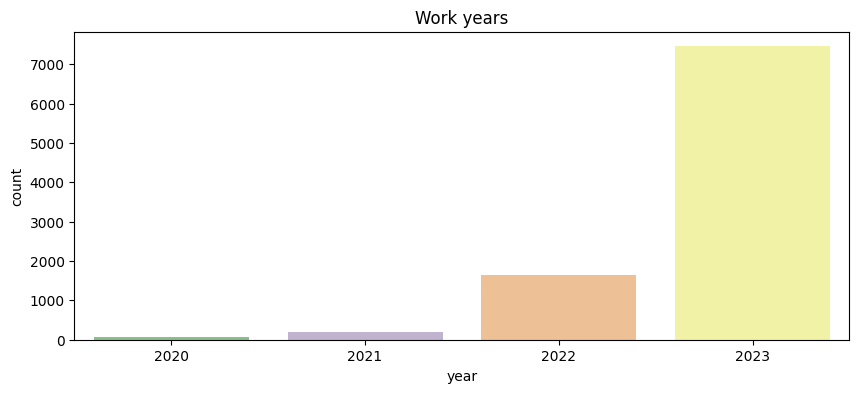

In [ ]:
plt.figure(figsize=(10, 4))
plot = sns.countplot(data=df, x='year', palette='Accent')
plt.title("Work years")

In [ ]:
label_encoder = LabelEncoder()
df["experience"] = label_encoder.fit_transform(df['experience_level'])
df["work setting"] = label_encoder.fit_transform(df['work_setting'])
df["emp. type"] = label_encoder.fit_transform(df['employment_type'])

In [ ]:
df.describe()

,year,salary,experience,work setting,emp. type
count,9355.000000,9355.000000,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,2.581080,1.346660,1.996366
std,0.519470,63608.835387,0.788471,0.517058,0.104361
min,2020.000000,14000.000000,0.000000,0.000000,0.000000
25%,2023.000000,105200.000000,2.000000,1.000000,2.000000
50%,2023.000000,143860.000000,3.000000,1.000000,2.000000
75%,2023.000000,187000.000000,3.000000,2.000000,2.000000
max,2023.000000,450000.000000,3.000000,2.000000,3.000000


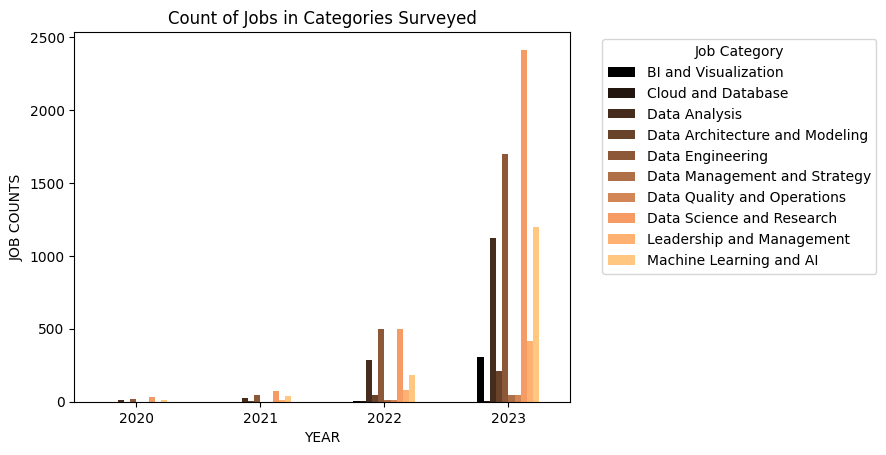

In [ ]:
jcat2 = df.groupby(['year'])['job_category'].value_counts().unstack().fillna(0)

ax = jcat2.plot.bar(title='Count of Jobs in Categories Surveyed', cmap='copper')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel("JOB COUNTS")
plt.xlabel("YEAR")

plt.show()

In [ ]:
mean_salaries = df.groupby('year')['salary'].mean()

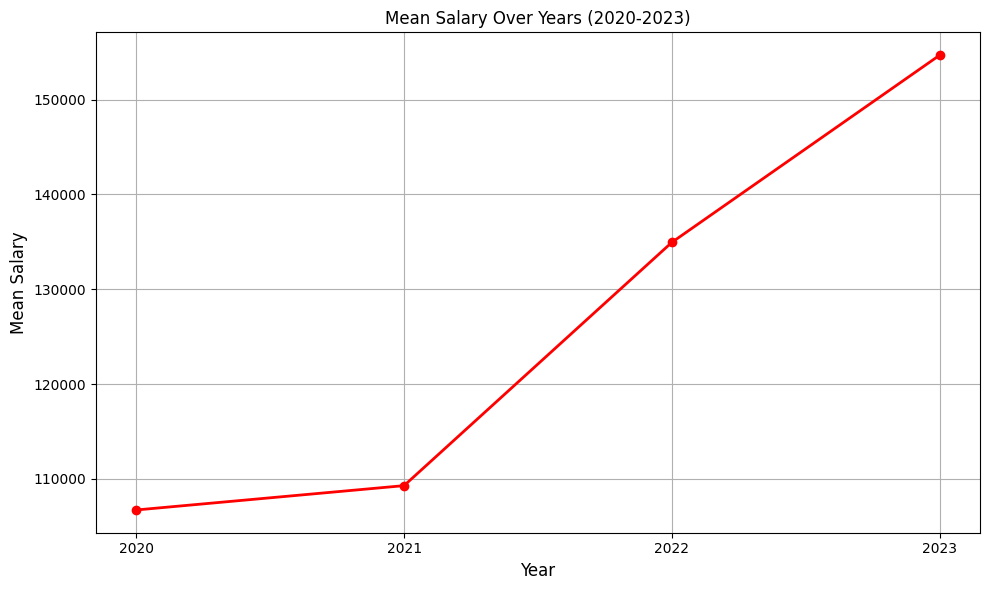

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mean_salaries.index, mean_salaries.values, marker='o', linestyle='-', color='red', linewidth=2, label='Mean Salary Trend')
plt.title('Mean Salary Over Years (2020-2023)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12)
plt.grid(True)
plt.xticks(mean_salaries.index)
plt.tight_layout()
plt.show()

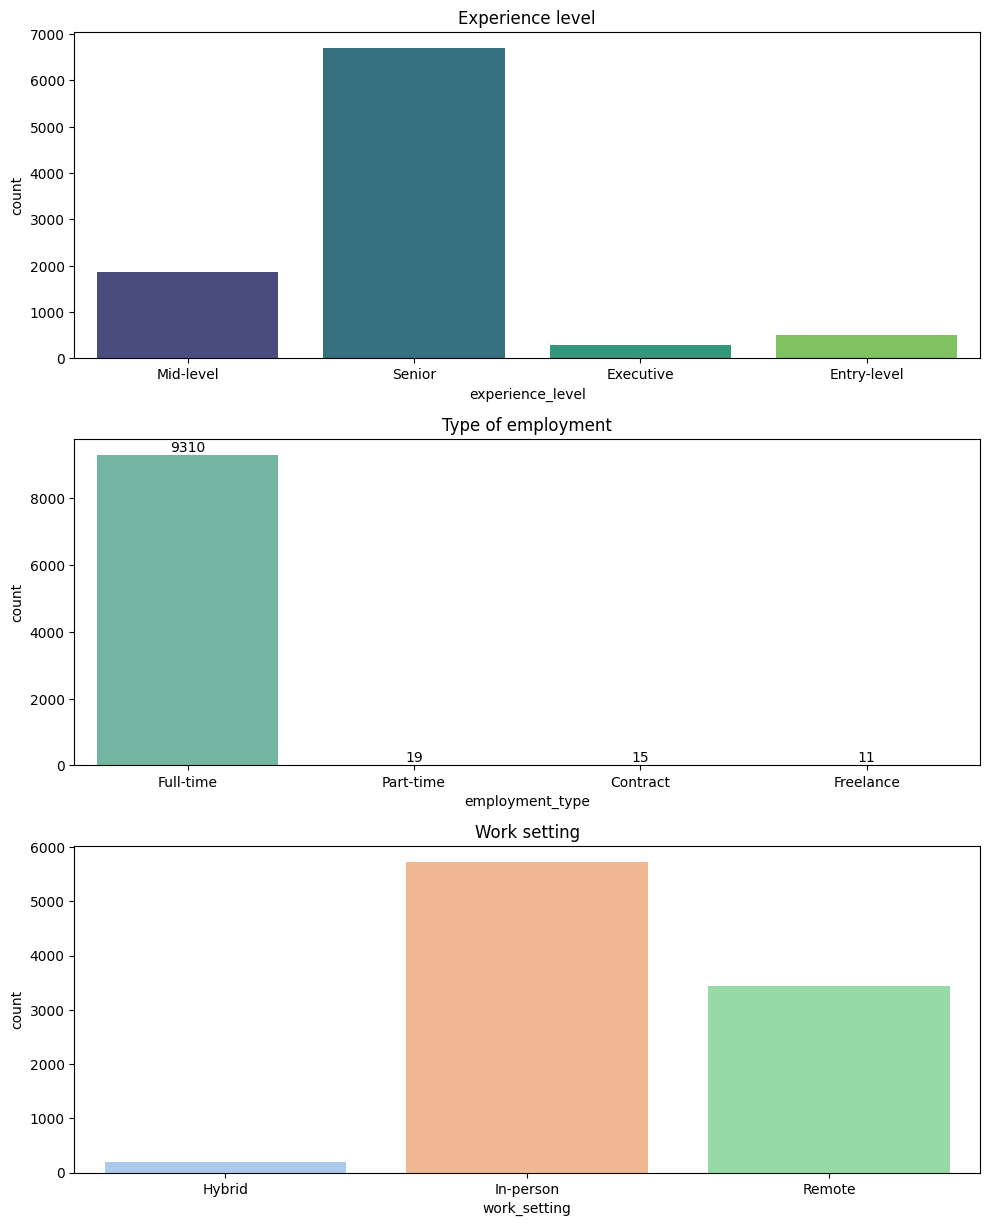

In [ ]:
fig = plt.figure(figsize=(10, 16))
plt.subplot(4, 1, 1)
plot = sns.countplot(data=df, x='experience_level', palette='viridis')
plt.title("Experience level")
plt.title("Experience level")

plt.subplot(4, 1, 2)
plot = sns.countplot(data=df, x='employment_type', palette='Set2')
value_counts = df['employment_type'].value_counts()
for i, v in enumerate(value_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.title("Type of employment")

plt.subplot(4, 1, 3)
plot = sns.countplot(data=df, x='work_setting', palette='pastel')
plt.title("Work setting")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()